In [ ]:
pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 5.5MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894088 sha256=d4bf684e53a425e354c27ff12ab88b12d22c1c0442a935923a6d1821d1b5ecea
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


# Fuzzification


Setting Range dan membership untuk variabel temperature. Selain itu, dilakukan juga deklarasi temperature, humidity, dan wind sebagai variabel input (Antecedent). Adapun rain di deklarasikan sebagai output (Consequent)

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
temperature = ctrl.Antecedent(np.arange(24, 26.5, 0.01), 'temperature')
humidity = ctrl.Antecedent(np.arange(77, 84, 0.01), 'humidity')
wind = ctrl.Antecedent(np.arange(0, 4, 0.01), 'wind')
rain = ctrl.Consequent(np.arange(4, 8, 0.01), 'rain')

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
temperature['very low'] = fuzz.trimf(temperature.universe, [24.74, 24.94, 25.14])
temperature['low'] = fuzz.trimf(temperature.universe, [24.94, 25.14, 25.34])
temperature['medium'] = fuzz.trimf(temperature.universe, [25.14, 25.34, 25.53])
temperature['high'] = fuzz.trimf(temperature.universe, [25.34, 25.53, 25.73])
temperature['very high'] = fuzz.trimf(temperature.universe, [25.53, 25.73, 25.90])

set membership untuk variabel input (antecedent) dan output (Consequent) berdasarkan sistem pakar

In [ ]:
humidity['very low'] = fuzz.trimf(humidity.universe, [77.55, 78.41, 79.27])
humidity['low'] = fuzz.trimf(humidity.universe, [78.41, 79.26, 80.13])
humidity['medium'] = fuzz.trimf(humidity.universe, [79.26, 80.13, 80.99])
humidity['high'] = fuzz.trimf(humidity.universe, [80.13, 80.99, 81.85])
humidity['very high'] = fuzz.trimf(humidity.universe, [80.99, 81.85, 82.72])

In [ ]:
wind['very low'] = fuzz.trimf(wind.universe, [0.09, 0.50, 0.91])
wind['low'] = fuzz.trimf(wind.universe, [0.50, 0.91, 1.32])
wind['medium'] = fuzz.trimf(wind.universe, [0.91, 1.32, 1.73])
wind['high'] = fuzz.trimf(wind.universe, [1.13, 1.73, 2.14])
wind['very high'] = fuzz.trimf(wind.universe, [1.73, 2.14, 2.55])

In [ ]:
rain['very low'] = fuzz.trimf(rain.universe, [4.8, 5.15, 5.5])
rain['low'] = fuzz.trimf(rain.universe, [5.15, 5.5, 5.9])
rain['medium'] = fuzz.trimf(rain.universe, [5.5, 5.9, 6.25])
rain['high'] = fuzz.trimf(rain.universe, [5.9, 6.25, 6.6])
rain['very high'] = fuzz.trimf(rain.universe, [6.25, 6.6, 6.95])

Model mamdani untuk setiap variabel dilihat berdasarkan nilai membership setiap variabelnya

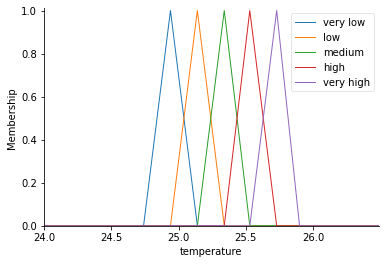

In [ ]:
# You can see how these look with .view()
temperature.view()

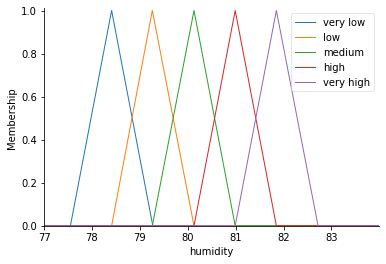

In [ ]:
humidity.view()

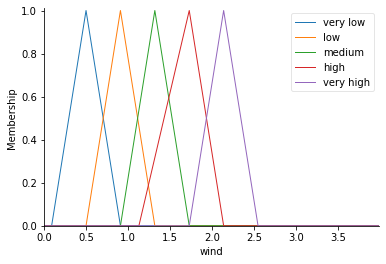

In [ ]:
wind.view()

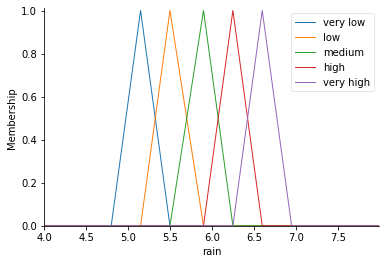

In [ ]:
rain.view()

# Fuzzy Inference engine

Set inference rule menggunakan operator AND berdasarkan sistem pakar

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa0de743290>)

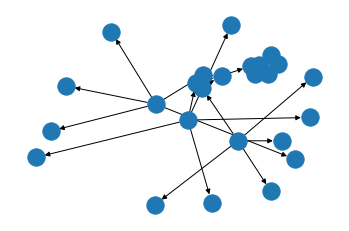

In [ ]:
rule1 = ctrl.Rule(temperature['very low'] & wind['low'] & humidity['very high'], rain['very low'])
rule2 = ctrl.Rule(temperature['medium'] & wind['low'] & humidity['high'], rain['medium'])
rule3 = ctrl.Rule(temperature['low'] & wind['very low'] & humidity['high'], rain['medium'])
rule4 = ctrl.Rule(temperature['low'] & wind['very low'] & humidity['high'], rain['low'])
rule5 = ctrl.Rule(temperature['low'] & wind['very low'] & humidity['low'], rain['very low'])
rule6 = ctrl.Rule(temperature['medium'] & wind['high'] & humidity['low'], rain['low'])
rule7 = ctrl.Rule(temperature['medium'] & wind['very high'] & humidity['low'], rain['low'])
rule8 = ctrl.Rule(temperature['medium'] & wind['very high'] & humidity['medium'], rain['very high'])
rule9 = ctrl.Rule(temperature['very high'] & wind['very high'] & humidity['medium'], rain['high'])
rule10 = ctrl.Rule(temperature['very high'] & wind['very high'] & humidity['high'], rain['low'])

rule1.view()

In [ ]:
raining_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
raining = ctrl.ControlSystemSimulation(raining_ctrl)

# Testing

Dilakukan percobaan dengan memasukan nilai input acak (tetap dalam range berdasarkan rule yang tersedia)

In [ ]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
raining.input['temperature'] = 25.30
raining.input['humidity'] = 80.8
raining.input['wind'] = 0.80

# Crunch the numbers
raining.compute()
print(raining.output['rain'])

5.794323279645332


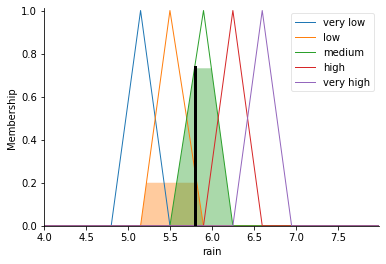

In [ ]:
rain.view(sim=raining)